# Projet reconnaissance faciale
### Objet du projet
L'objet de ce projet est de concevoir un modèle permettant la reconnaissance faciale d'individus en utilisant deux types de descripteurs : la transformation de fourier discrète ainsi que le HOG. On utilisera dans ce projet la base de données YaleFaces donnant 11 images différentes de 15 individus différents. 

Au préalable un code python a été utilisé pour créer le dossier yalefaces-gifs ajoutant l'extension .gif à tous les fichiers
### Importation des librairies

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import hog 
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import cmath
import os
import itertools

### Lecture et préparation des données 
On utilise alors une fonction nous permettant de lire à travers le dossier et de les mettre dans une liste 

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = io.imread(os.path.join(folder,filename), as_gray = True)
        if img is not None:
            #img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
            images.append(img)
    return images


In [3]:
images_sujet1 = load_images_from_folder("yalefacesgif/subject01")
images_sujet2 = load_images_from_folder("yalefacesgif/subject02")
images_sujet3 = load_images_from_folder("yalefacesgif/subject03")
images_sujet4 = load_images_from_folder("yalefacesgif/subject04")
images_sujet5 = load_images_from_folder("yalefacesgif/subject05")
images_sujet6 = load_images_from_folder("yalefacesgif/subject06")
images_sujet7 = load_images_from_folder("yalefacesgif/subject07")
images_sujet8 = load_images_from_folder("yalefacesgif/subject08")
images_sujet9 = load_images_from_folder("yalefacesgif/subject09")
images_sujet10 = load_images_from_folder("yalefacesgif/subject10")
images_sujet11 = load_images_from_folder("yalefacesgif/subject11")
images_sujet12 = load_images_from_folder("yalefacesgif/subject12")
images_sujet13 = load_images_from_folder("yalefacesgif/subject13")
images_sujet14 = load_images_from_folder("yalefacesgif/subject14")
images_sujet15 = load_images_from_folder("yalefacesgif/subject15")

images_sujet = images_sujet1 + images_sujet2 + images_sujet3 + images_sujet4 + images_sujet5 + images_sujet6 + images_sujet7 + images_sujet8 + images_sujet9 + images_sujet10 + images_sujet11 + images_sujet12 + images_sujet13 + images_sujet14 + images_sujet15 

### Pré-traitement des images
Les images maintenant téléchargées, on va commencer par un pré-traitement des données en s'assurant de la taille des images qu'elles soit toute de la bonne taille, les photos sont d'assez bonne qualité l'application d'un filtre n'est pas nécessaire

In [6]:
def image_resizer (listimage) :
    dim = (320 , 243)
    for i in range(len(listimage)) :
        listimage[i] = cv.resize(listimage[i],dim)
image_resizer(images_sujet)

### Calcul des vecteurs descripteurs
Pour se faire on va utiliser deux descripteurs dont on comparera les performances par la suite : 
1. Descripteur constitué des coefficients de la transformée de Fourier discrète
2. Utilisation de la matrice des gradients orientés (HOG)

On commence par le calcul de la transformée de Fourier pour chaque image, en prenant que les 50 premiers coefficients

In [55]:
def calcul_dct (listimage) : 
    dct = list()
    for i in range(len(listimage)) :
        h,w = listimage[i].shape
        nouvelleimage = np.zeros((h,w), np.float32)
        listimage[i] = np.float32(listimage[i])
        cv.dct(listimage[i],nouvelleimage)
        zigzagDCT = np.concatenate([np.diagonal(nouvelleimage[::-1,:], i)[::(2*(i % 2)-1)] for i in range(1-nouvelleimage.shape[0], nouvelleimage.shape[0])])
        dct.append(zigzagDCT[:50]) # On prend les 50 premiers coefficients
    return dct

dct_images = calcul_dct(images_sujet)

Maintenant on calcule le HOG pour toutes les images qu'on a 

In [19]:
def hog_list (listimage) :
    fv = []
    hog_image = []
    for i in range(len(listimage)) :
        a, b = hog(listimage[i], orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=False)
        fv.append(a)
        hog_image.append(b)
    return fv,hog_image

fv_images, hog_images = hog_list(images_sujet)

On procède maintenant à l'étiquetage pour les passer au modèle d'apprentissage

In [22]:
def etiquetage (listimage, etiquette) :
    etiq = []
    for i in range(len(listimage)) :
        etiq.append(etiquette)
    return etiq
etiq_sujet1 = etiquetage(images_sujet1, 1)
etiq_sujet2 = etiquetage(images_sujet2, 2)
etiq_sujet3 = etiquetage(images_sujet3, 3)
etiq_sujet4 = etiquetage(images_sujet4, 4)
etiq_sujet5 = etiquetage(images_sujet5, 5)
etiq_sujet6 = etiquetage(images_sujet6, 6)
etiq_sujet7 = etiquetage(images_sujet7, 7)
etiq_sujet8 = etiquetage(images_sujet8, 8)
etiq_sujet9 = etiquetage(images_sujet9, 9)
etiq_sujet10 = etiquetage(images_sujet10, 10)
etiq_sujet11 = etiquetage(images_sujet11, 11)
etiq_sujet12 = etiquetage(images_sujet12, 12)
etiq_sujet13 = etiquetage(images_sujet13, 13)
etiq_sujet14 = etiquetage(images_sujet14, 14)
etiq_sujet15 = etiquetage(images_sujet15, 15)

etiq_images = etiq_sujet1 + etiq_sujet2 + etiq_sujet3 + etiq_sujet4 + etiq_sujet5 + etiq_sujet6 + etiq_sujet7 + etiq_sujet8 + etiq_sujet9 + etiq_sujet10 + etiq_sujet11 + etiq_sujet12 + etiq_sujet13 + etiq_sujet14 + etiq_sujet15

On prépare les données pour le modèle alors on transforme les vecteurs caractéristiques en Dataframe et l vecteur caractéristique en vecteur numpy 

In [60]:
dct_images = pd.DataFrame(dct_images)
fv_images = pd.DataFrame(fv_images)
etiq_images = np.array(etiq_images)
dct_images

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,51438.828125,-1403.032104,7817.089844,13573.364258,583.252380,3654.186523,4505.488281,-2382.768066,510.328949,-7323.537598,...,59.297302,1456.755981,-1733.324707,-45.802898,-781.428772,343.330444,-53.683086,-1284.838013,1620.752319,671.364380
1,55972.703125,-218.777435,4365.300781,12583.668945,169.961807,2727.153809,4043.186768,-1493.898438,-636.595093,-5277.602051,...,133.352036,851.471741,-1463.824951,-470.098145,-945.734985,-417.011780,9.710585,-2280.374268,935.699280,667.534607
2,55349.019531,-402.420654,4377.989746,13218.046875,267.935852,2785.315674,3949.806885,-1399.352783,-584.821838,-5294.264648,...,485.334167,758.325500,-807.296387,-578.325500,-1106.769409,-798.017761,100.052490,-2885.133545,597.444275,780.596375
3,39917.492188,85.160873,22260.294922,4307.240234,-1332.098633,3202.707520,3555.687012,-2089.025391,1175.139893,-3628.259033,...,1386.270264,1155.244385,-736.304199,-611.318237,472.683441,817.143127,-1444.434692,-1039.232056,636.644714,551.664917
4,57157.367188,-155.433655,7037.697754,8792.008789,62.089748,3493.884277,4646.664062,-2194.238525,-316.772461,-7176.699219,...,5.149107,1173.247070,-1252.421631,-639.188904,-1668.732544,220.985718,508.165192,-1380.901489,1340.482544,256.292389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,37743.843750,4112.418945,-15146.181641,11748.606445,3040.825439,5450.437988,6172.770508,1175.407593,-1110.169556,-898.862915,...,1283.886230,896.897705,-935.982605,730.382080,-790.441467,38.851681,960.622437,765.083191,316.212555,1055.967896
161,53372.859375,1600.918457,3744.088379,16484.669922,-1068.515747,1693.138672,4190.937988,-131.563583,-1215.787109,-5076.214844,...,1584.521484,1173.560303,-3363.099121,-399.989624,-2286.594238,529.669983,83.699219,883.380798,1777.412354,1831.368286
162,51463.746094,364.250854,1436.081787,18671.414062,-633.736633,-1629.247681,3143.263428,156.964767,322.969543,-1796.595093,...,590.828125,-294.193451,-4201.247070,-257.959595,-796.405884,-218.606293,-275.262207,-3176.955322,113.566910,-714.379700
163,50371.410156,809.220459,1761.498169,19404.064453,-944.745667,-1395.843872,3341.656738,431.984375,163.664886,-2033.109619,...,997.998901,-467.164368,-3641.683838,-362.919495,-648.619446,-238.422623,-322.283203,-3787.245117,198.546066,-1000.501770


### Test de l'efficacité des descripteurs
On fera alors pour chaque descripteur un test en utilisant l'algorithme K-plus proches voisins et en utilisant un réseaux de neurones multicouches. En comparant les performances entre les deux algorithmes en terme de performance et par la suite en comparant l'efficacité des deux descripteurs vis-à-vis de ce problème
#### En utilisant la transformée de Fourier en cosinus discret
##### Algoithme K-plus proches voisins (KNN)

In [145]:
dct_train, dct_test, etiq_train, etiq_test = train_test_split(dct_images, etiq_images, test_size=0.3,random_state=42) 
print("Le nombre d'échantillon d'entrainement = ",dct_train.shape)
print("Le nombre d'échantillon de test = ",dct_test.shape)

Le nombre d'échantillon d'entrainement =  (115, 50)
Le nombre d'échantillon de test =  (50, 50)


Maintenant on passe à l'entrainement et au test du modèle

In [148]:
K=3
# la mesure de distance est mise par défaut et c'est donc une distance Euclidienne
voisin = KNeighborsClassifier(n_neighbors = K, p = 1).fit(dct_train,etiq_train)
ypredict = voisin.predict(dct_test)
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, ypredict))

Taux de précision lors des tests :  0.88


On va maintenant montrer l'impact de la modification des paramètres : 
1. Nombre de voisins
2. Choix de la distance choisi 

Pour observer l'impact sur les performances de notre modèle vis-à-vis de ce problème

[0.88, 0.8, 0.8, 0.88, 0.84, 0.82, 0.8, 0.8, 0.82, 0.68, 0.72, 0.76, 0.6, 0.58, 0.6]


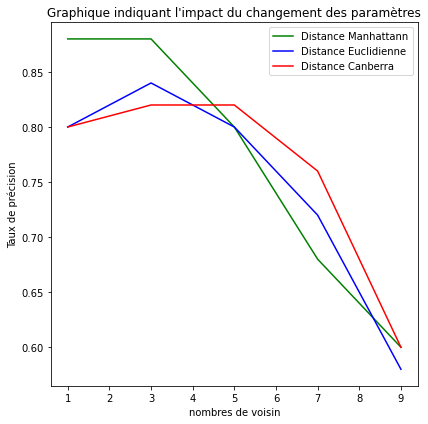

In [147]:
train_test = []
for k in range(1,10,2) :
    for i in range(1,4) : 
        voisin = KNeighborsClassifier(n_neighbors = k, p = i).fit(dct_train,etiq_train)
        ypredict = voisin.predict(dct_test)
        train_test.append(metrics.accuracy_score(etiq_test, ypredict))
print(train_test)

# On va maintenant visualiser les résultats
plt.figure(figsize=(6,6))
plt.plot(range(1,10,2),[train_test[0],train_test[3],train_test[6],train_test[9],train_test[12]],'g', label='Distance Manhattann')
plt.plot(range(1,10,2),[train_test[1],train_test[4],train_test[7],train_test[10],train_test[13]],'b', label='Distance Euclidienne')
plt.plot(range(1,10,2),[train_test[2],train_test[5],train_test[8],train_test[11],train_test[14]],'r', label='Distance Canberra')
plt.title("Graphique indiquant l'impact du changement des paramètres")
plt.legend(loc="upper right")
plt.ylabel("Taux de précision")
plt.xlabel("nombres de voisin")
plt.tight_layout()
plt.show()


On observe alors qu'on a les meilleurs résultats en utilisant la distance Manhattann : 
$$
    D(a,b) = \sum^n_{i=1}|a_i - b_i|
$$
Ainsi qu'en utilisant un nombre k=3 de voisins pris en compte, dans cette configuration on a 88% de précision. On calcule dans ce cas la matrice de confusion

In [149]:
voisin = KNeighborsClassifier(n_neighbors = 3, p = 1).fit(dct_train,etiq_train)
ypredict = voisin.predict(dct_test)
print("Matrice de confusion : \n")
pd.DataFrame(metrics.confusion_matrix(etiq_test, ypredict))

Matrice de confusion : 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,2,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


Maintenant en utilisant un réseau de neurones multicouches (MLP)
##### Réseaux de neurones multicouches (MLP)

In [175]:
taillecouche = list()
performance = list()
for couche1 in range(35,43) :
    for couche2 in range(20,28) :
        for couche3 in range(10,20) :
            modele = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='tanh', max_iter = 1000 , hidden_layer_sizes=(couche1,couche2,couche3), random_state=1).fit(dct_train,etiq_train)
            taillecouche.append((couche1,couche2,couche3))
            performance.append((metrics.accuracy_score(etiq_train, modele.predict(dct_train)), modele.score(dct_test,etiq_test)))
print(taillecouche)
print(performance)


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

[(35, 20, 10), (35, 20, 11), (35, 20, 12), (35, 20, 13), (35, 20, 14), (35, 20, 15), (35, 20, 16), (35, 20, 17), (35, 20, 18), (35, 20, 19), (35, 21, 10), (35, 21, 11), (35, 21, 12), (35, 21, 13), (35, 21, 14), (35, 21, 15), (35, 21, 16), (35, 21, 17), (35, 21, 18), (35, 21, 19), (35, 22, 10), (35, 22, 11), (35, 22, 12), (35, 22, 13), (35, 22, 14), (35, 22, 15), (35, 22, 16), (35, 22, 17), (35, 22, 18), (35, 22, 19), (35, 23, 10), (35, 23, 11), (35, 23, 12), (35, 23, 13), (35, 23, 14), (35, 23, 15), (35, 23, 16), (35, 23, 17), (35, 23, 18), (35, 23, 19), (35, 24, 10), (35, 24, 11), (35, 24, 12), (35, 24, 13), (35, 24, 14), (35, 24, 15), (35, 24, 16), (35, 24, 17), (35, 24, 18), (35, 24, 19), (35, 25, 10), (35, 25, 11), (35, 25, 12), (35, 25, 13), (35, 25, 14), (35, 25, 15), (35, 25, 16), (35, 25, 17), (35, 25, 18), (35, 25, 19), (35, 26, 10), (35, 26, 11), (35, 26, 12), (35, 26, 13), (35, 26, 14), (35, 26, 15), (35, 26, 16), (35, 26, 17), (35, 26, 18), (35, 26, 19), (35, 27, 10), (35, 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


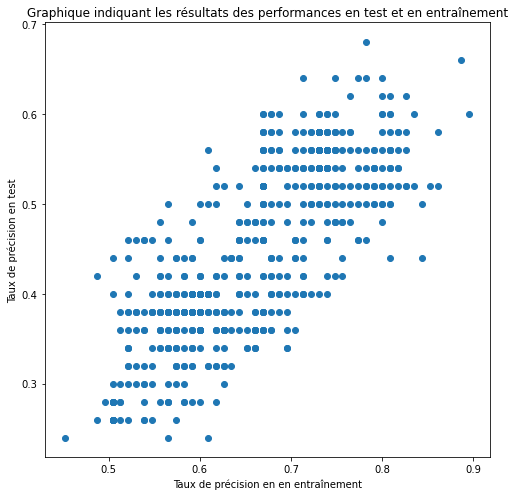

Meilleur résultat en test :  0.68


In [183]:
x, y = zip(*performance)
plt.figure(figsize=(7,7))
plt.scatter(x, y)
plt.title("Graphique indiquant les résultats des performances en test et en entraînement")
plt.ylabel("Taux de précision en test")
plt.xlabel("Taux de précision en en entraînement")
plt.tight_layout()
plt.show()
print("Meilleur résultat en test : ",max(y))

On observe bien que le réseau de neurones multicouches a de moins bons résultats sur ce problème que l'algorithme des K-plus proches voisins avec ce descripteur, on a le meilleur résultat avec 68% sur l'ensemble de test, on va retrouver tous les détails de cette configuration : précision sur l'ensemble d'entraînement et ensuite affichage de la matrice de confusion

In [189]:
# On retrouve d'abord l'index du max de la précision sur l'ensemble de test
indexMax = y.index(max(y))
print('Les meilleurs résultats en test sont de : ',max(y))
print('Correspondant alors aux résultats en entrainement de : ',x[indexMax])
print('Qui ont été obtenus grâce à la configuration suivante en terme de nombre de neurones dans les couches intermédiaires :\n ',taillecouche[indexMax])
modele = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='tanh', max_iter = 1000 , hidden_layer_sizes=taillecouche[indexMax], random_state=1).fit(dct_train,etiq_train)
ymodele = modele.predict(dct_test)
print("Matrice de confusion : \n")
pd.DataFrame(metrics.confusion_matrix(etiq_test, ymodele))

Les meilleurs résultats en test sont de :  0.68
Correspondant alors aux résultats en entrainement de :  0.782608695652174
Qui ont été obtenus grâce à la configuration suivante en terme de nombre de neurones dans les couches intermédiaires :
  (36, 20, 11)
Matrice de confusion : 



C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,2,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0
8,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0
9,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


Alors au vu de ces résultats on peut donner plusieurs remarques : 
- On voit bien que la prédiction est relativement bonne mais on remarque que certains individus la prédiction est quasi nulle sur l'ensemble de test (sujet 8 et 9) et au contraire certains individus on a une précision de 100% (comme par exemple le sujet 2), ce qui est un indicateur que les classes sont déséquilibrées et donc faudrait un départage plus équitable des différents individus dans l'ensemble d'entraînement. 
- Aussi une autre remarque pour l'amélioration des performances est d'application une augmentation des données, on observe effectivement que la variance est relativement élevée en comparant les résultats en entrainement et en test ce qui est indicateur d'un sur-apprentissage, on devrait alors dans de futurs tests appliquer une augmentation des données (appliquer des zooms et décalages et changement d'intensité de la lumière) ainsi en augmentant la taille du dataset de départ on pourrait ainsi avoir de bien meilleurs résultats. 

Maintenant en utilisant un autre descripteur : le HOG on va refaire la même manipulation 
#### En utilisant la matrice des gradients orientés (HOG)
##### L'algorithme des K-plus prohces voisins (KNN)

In [208]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(fv_images, etiq_images, test_size=0.3,random_state=42) 
print("Le nombre d'échantillon d'entrainement = ",fv_train.shape)
print("Le nombre d'échantillon de test = ",fv_test.shape)

Le nombre d'échantillon d'entrainement =  (115, 40716)
Le nombre d'échantillon de test =  (50, 40716)


[0.86, 0.86, 0.88, 0.86, 0.88, 0.84, 0.8, 0.84, 0.78, 0.68, 0.78, 0.74, 0.68, 0.72, 0.7]


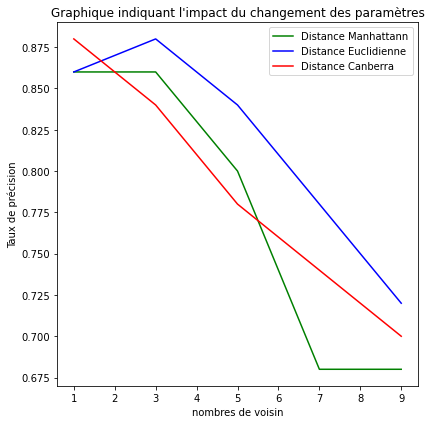

In [209]:
train_test = []
for k in range(1,10,2) :
    for i in range(1,4) : 
        voisin = KNeighborsClassifier(n_neighbors = k, p = i).fit(fv_train,etiq_train)
        ypredict = voisin.predict(fv_test)
        train_test.append(metrics.accuracy_score(etiq_test, ypredict))
print(train_test)

# On va maintenant visualiser les résultats
plt.figure(figsize=(6,6))
plt.plot(range(1,10,2),[train_test[0],train_test[3],train_test[6],train_test[9],train_test[12]],'g', label='Distance Manhattann')
plt.plot(range(1,10,2),[train_test[1],train_test[4],train_test[7],train_test[10],train_test[13]],'b', label='Distance Euclidienne')
plt.plot(range(1,10,2),[train_test[2],train_test[5],train_test[8],train_test[11],train_test[14]],'r', label='Distance Canberra')
plt.title("Graphique indiquant l'impact du changement des paramètres")
plt.legend(loc="upper right")
plt.ylabel("Taux de précision")
plt.xlabel("nombres de voisin")
plt.tight_layout()
plt.show()

En utilisant l'algorithme des K-plus proches voisins on voit bien qu'on a les mêmes résultats maximaux qui sont de 88% sur l'ensemble de test, mais on voit bien que la mesure de distance qui nous a fait obtenir ce résultat est différente, sur cet ensemble le meilleur résultat est obtenu grâce à la distance Euclidienne (ou Canberra) avec un nombre K=3 voisins.

On affiche maintenant dans cette configuration la matrice de confusion pour observer les résultats obtenus

In [192]:
voisin = KNeighborsClassifier(n_neighbors = 3, p = 2).fit(fv_train,etiq_train)
ypredict = voisin.predict(fv_test)
print("Matrice de confusion : \n")
pd.DataFrame(metrics.confusion_matrix(etiq_test, ypredict))

Matrice de confusion : 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0
7,0,0,2,0,0,0,0,1,1,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


On voit que globalement les résultats sont bien uniformes, néanmoins on voit bien que le sujet 8 on a une précision très basse ce qui indique qu'on n'a pas eu assez de données dessus, indicateur que la classe est mal représentée en entraînement, chose qu'on devrait améliorer. Maintenant en utilisant un réseau de neurones multicouches 
##### Réseau de neurones multicouches (MLP)

In [210]:

taillecouche = list()
performance = list()
for couche1 in range(37,43) :
    for couche2 in range(25,28) :
        for couche3 in range(15,25) :
            modele = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='tanh', max_iter = 1000 , hidden_layer_sizes=(couche1,couche2,couche3), random_state=1).fit(fv_train,etiq_train)
            taillecouche.append((couche1,couche2,couche3))
            performance.append((metrics.accuracy_score(etiq_train, modele.predict(fv_train)), modele.score(fv_test,etiq_test)))
print(performance)

[(1.0, 0.84), (1.0, 0.78), (1.0, 0.82), (1.0, 0.82), (1.0, 0.8), (1.0, 0.78), (1.0, 0.88), (1.0, 0.88), (1.0, 0.8), (1.0, 0.88), (1.0, 0.78), (1.0, 0.86), (1.0, 0.76), (1.0, 0.88), (1.0, 0.84), (1.0, 0.86), (1.0, 0.82), (1.0, 0.8), (1.0, 0.82), (1.0, 0.88), (1.0, 0.82), (1.0, 0.8), (1.0, 0.74), (1.0, 0.86), (1.0, 0.76), (1.0, 0.88), (1.0, 0.94), (1.0, 0.86), (1.0, 0.8), (1.0, 0.86), (1.0, 0.94), (1.0, 0.84), (1.0, 0.78), (1.0, 0.82), (1.0, 0.86), (1.0, 0.82), (1.0, 0.9), (1.0, 0.92), (1.0, 0.86), (1.0, 0.88), (1.0, 0.78), (1.0, 0.82), (1.0, 0.82), (1.0, 0.9), (1.0, 0.8), (1.0, 0.74), (1.0, 0.86), (1.0, 0.78), (1.0, 0.86), (1.0, 0.78), (1.0, 0.76), (1.0, 0.78), (1.0, 0.78), (1.0, 0.82), (1.0, 0.92), (1.0, 0.82), (1.0, 0.88), (1.0, 0.86), (1.0, 0.84), (1.0, 0.82), (1.0, 0.78), (1.0, 0.9), (1.0, 0.92), (1.0, 0.88), (1.0, 0.78), (1.0, 0.78), (1.0, 0.88), (1.0, 0.82), (1.0, 0.92), (1.0, 0.92), (1.0, 0.84), (1.0, 0.9), (1.0, 0.74), (1.0, 0.92), (1.0, 0.78), (1.0, 0.84), (1.0, 0.94), (1.0, 0.

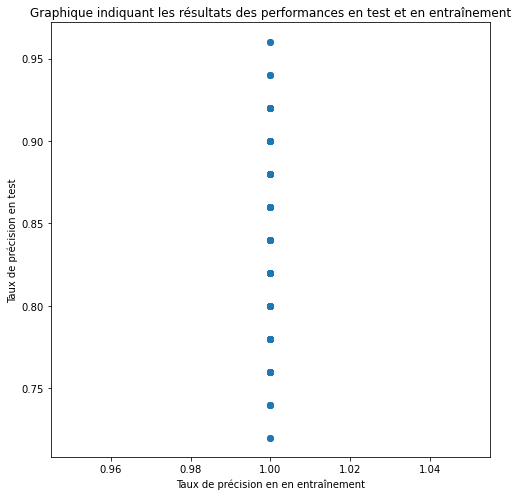

Meilleur résultat en test :  0.96


In [211]:
x, y = zip(*performance)
plt.figure(figsize=(7,7))
plt.scatter(x, y)
plt.title("Graphique indiquant les résultats des performances en test et en entraînement")
plt.ylabel("Taux de précision en test")
plt.xlabel("Taux de précision en en entraînement")
plt.tight_layout()
plt.show()
print("Meilleur résultat en test : ",max(y))

On voit très clairement que les résultats sont nettement supérieur à ceux obtenus à travers la transformée de Fourier en cosinus discret. Ce qui fait du HoG un bien meilleur descripteur dans ce problème de reconnaissance facial, on retrouve ainsi la configuration du réseau de neurone qui nous a permis d'optimiser les résultats et on affiche la matrice de confusion correspondante : 

In [212]:
# On retrouve d'abord l'index du max de la précision sur l'ensemble de test
indexMax = y.index(max(y))
print('Les meilleurs résultats en test sont de : ',max(y))
print('Correspondant alors aux résultats en entrainement de : ',x[indexMax])
print('Qui ont été obtenus grâce à la configuration suivante en terme de nombre de neurones dans les couches intermédiaires :\n ',taillecouche[indexMax])
modele = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='tanh', max_iter = 1000 , hidden_layer_sizes=taillecouche[indexMax], random_state=1).fit(fv_train,etiq_train)
ymodele = modele.predict(fv_test)
print("Matrice de confusion : \n")
pd.DataFrame(metrics.confusion_matrix(etiq_test, ymodele))

Les meilleurs résultats en test sont de :  0.96
Correspondant alors aux résultats en entrainement de :  1.0
Qui ont été obtenus grâce à la configuration suivante en terme de nombre de neurones dans les couches intermédiaires :
  (40, 25, 20)
Matrice de confusion : 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,5,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


On observe effectivement que les résultats sont excellent en utilisant le HoG ce qui en fait un meilleur descripteur que la transformée de fourier en cosinus discret précédemment utilisé. 